In [30]:
import pandas as pd
import numpy as np

## Israel-Palestine

In [31]:
csv = pd.read_csv('../csv/escalation_hostilities_israel_palestine.csv')
csv.drop(columns=['Unnamed: 8', 'Unnamed: 9'], inplace=True)
csv['date'] = pd.to_datetime(csv['date'])
csv = csv.sort_values(by='date')
csv.head()

,date,killed total,killed female,killed male,killed undefined,injured,displaced,damaged housing units
0,2023-10-07,275,6.0,269.0,0.0,NaN,NaN,NaN
1,2023-10-08,451,64.0,387.0,0.0,NaN,NaN,NaN
2,2023-10-09,681,145.0,536.0,0.0,NaN,NaN,NaN
3,2023-10-10,927,234.0,693.0,0.0,NaN,NaN,NaN
4,2023-10-11,1206,355.0,851.0,0.0,NaN,NaN,NaN


In [39]:
cols_to_fix = ['killed total', 'killed female', 'killed male', 'killed undefined', 'injured', 'displaced']
csv[cols_to_fix] = csv[cols_to_fix].diff().fillna(csv[cols_to_fix])
# Ensure no negative values (inconsistent data)
if (csv[cols_to_fix] < 0).any().any():
	csv[cols_to_fix] = csv[cols_to_fix].clip(lower=0)

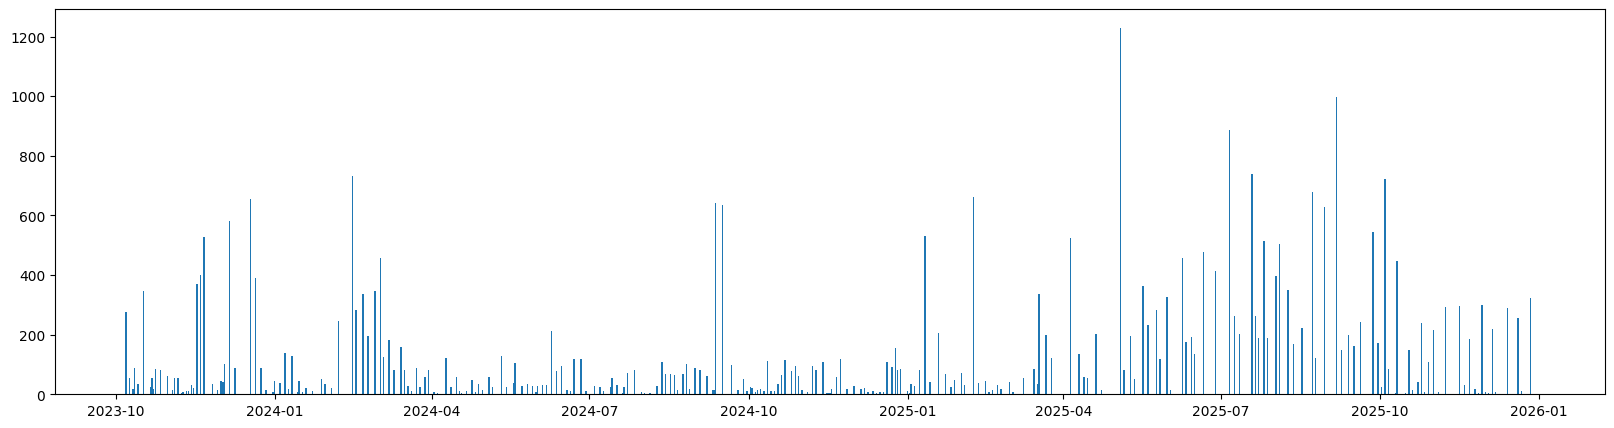

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(csv['date'], csv['killed total'])
plt.show()